In [1]:
pip install pandarallel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandarallel: filename=pandarallel-1.6.3-py3-none-any.whl size=16462 sha256=18f9130b442cf9b6f458be5cfbb73bf8308eea38b715d84bc674ef6646f64e96
  Stored in directory: /root/.cache/pip/wheels/3c/a4/19/02a1f08d032a017d5d7e22da595aa652ba0a2f2e22de73981b
Successfully built pandarallel


In [15]:
import sklearn as sk
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np

In [16]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
sentiments = SentimentIntensityAnalyzer()

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


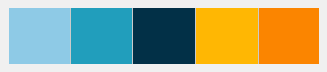

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import warnings
warnings.filterwarnings('ignore')
import re

# data munapltion
import pandas as pd
from pandarallel import pandarallel
import numpy as np
from datetime import datetime
import calendar

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from wordcloud import WordCloud,  ImageColorGenerator
# file, serialization and deserialization
import os
import missingno as mso
# NLP
# NLP preprocessing
from bs4 import BeautifulSoup
pandarallel.initialize(progress_bar=True)
import string
string.punctuation
import nltk
# Stop words present in the library
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
nltk.download('omw-1.4')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer

from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from yellowbrick.text import FreqDistVisualizer

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn import set_config
# LR
from sklearn.linear_model import LogisticRegression
# Model Evaluation
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,roc_auc_score
# encoder
from sklearn.feature_extraction.text import CountVectorizer
# prepare styles and colors for plots
style.use("fivethirtyeight")
colors = ["#8ecae6", "#219ebc", "#023047", "#ffb703", "#fb8500"]
palette = sns.color_palette(colors)
sns.palplot(sns.color_palette(colors))
plt.show()
style.use("fivethirtyeight")



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session#

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/MyDrive/review/Reviews.csv')

In [18]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,date,Month,Year,Full_Text,Full_Text_HTML,clean_review,lower_review
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,4,2011,Good Quality Dog Food I have bought several of...,Good Quality Dog Food I have bought several of...,Good Quality Dog Food I have bought several of...,good quality dog food i have bought several of...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07,9,2012,Not as Advertised Product arrived labeled as J...,Not as Advertised Product arrived labeled as J...,Not as Advertised Product arrived labeled as J...,not as advertised product arrived labeled as j...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18,8,2008,"""Delight"" says it all This is a confection tha...","""Delight"" says it all This is a confection tha...",Delight says it all This is a confection that ...,delight says it all this is a confection that ...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13,6,2011,Cough Medicine If you are looking for the secr...,Cough Medicine If you are looking for the secr...,Cough Medicine If you are looking for the secr...,cough medicine if you are looking for the secr...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21,10,2012,Great taffy Great taffy at a great price. The...,Great taffy Great taffy at a great price. The...,Great taffy Great taffy at a great price Ther...,great taffy great taffy at a great price ther...


In [19]:
df=df.dropna()

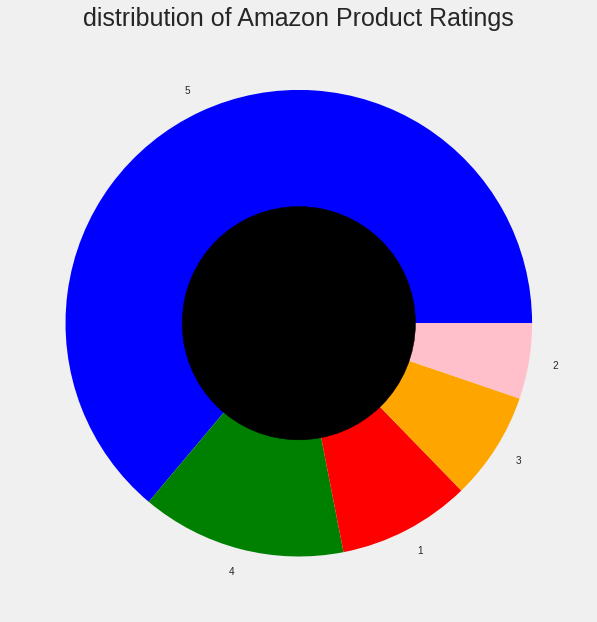

In [21]:
ratings = df["Score"].value_counts()
num = ratings.index
qty = ratings.values
cust_col = ["blue","green","red","orange","pink"]
plt.figure(figsize=(12,10))
plt.pie(qty,labels=num,colors = cust_col)
cent_circ = plt.Circle((0,0),0.5,color = 'black')
fig = plt.gcf()
fig.gca().add_artist(cent_circ)
plt.rc('font',size=13)
plt.title("distribution of Amazon Product Ratings",fontsize=25)
plt.show()

In [24]:
sentiments = SentimentIntensityAnalyzer()
df["Pos"] = [sentiments.polarity_scores(i)["pos"]for i in df["Text"]]
df["Neg"] = [sentiments.polarity_scores(i)["neg"]for i in df["Text"]]
df["Neut"] = [sentiments.polarity_scores(i)["neu"]for i in df["Text"]]
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,date,Month,Year,Full_Text,Full_Text_HTML,clean_review,lower_review,Pos,Neg,Neut
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,4,2011,Good Quality Dog Food I have bought several of...,Good Quality Dog Food I have bought several of...,Good Quality Dog Food I have bought several of...,good quality dog food i have bought several of...,0.305,0.000,0.695
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07,9,2012,Not as Advertised Product arrived labeled as J...,Not as Advertised Product arrived labeled as J...,Not as Advertised Product arrived labeled as J...,not as advertised product arrived labeled as j...,0.000,0.138,0.862
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18,8,2008,"""Delight"" says it all This is a confection tha...","""Delight"" says it all This is a confection tha...",Delight says it all This is a confection that ...,delight says it all this is a confection that ...,0.155,0.091,0.754
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13,6,2011,Cough Medicine If you are looking for the secr...,Cough Medicine If you are looking for the secr...,Cough Medicine If you are looking for the secr...,cough medicine if you are looking for the secr...,0.000,0.000,1.000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21,10,2012,Great taffy Great taffy at a great price. The...,Great taffy Great taffy at a great price. The...,Great taffy Great taffy at a great price Ther...,great taffy great taffy at a great price ther...,0.448,0.000,0.552


In [26]:
sum_pos = sum(df["Pos"])
sum_neg = sum(df["Neg"])
sum_neu = sum(df["Neut"])

In [27]:
def sent_score(a,b,c):
    if(a>b) and (a>c):
        print(" Review is Positive 😊")
    elif(b>a) and (b>c):
        print("Review is Negative 😊")
    else:
        print("Review is neither Positive nor Negative its Neutral 🙂")

In [28]:
sent_score(sum_pos,sum_neg,sum_neu)

Review is neither Positive nor Negative its Neutral 🙂


In [29]:
print("Positive Score: ",sum_pos)
print("Negative Score: ",sum_neg)
print("Neutral Score: ",sum_neu)

Positive Score:  109328.1269999992
Negative Score:  24033.022999999564
Neutral Score:  435043.95799998916


In [7]:
df['date'] = pd.to_datetime(df['Time'],unit='s')
df['Month']=df['date'].dt.month
df['Year']=df['date'].dt.year

Columns datatype: 
 Id                                 int64
ProductId                         object
UserId                            object
ProfileName                       object
HelpfulnessNumerator               int64
HelpfulnessDenominator             int64
Score                              int64
Time                               int64
Summary                           object
Text                              object
date                      datetime64[ns]
Month                              int64
Year                               int64
Full_Text                         object
Full_Text_HTML                    object
clean_review                      object
lower_review                      object
Pos                              float64
Neg                              float64
Neut                             float64
dtype: object


Text(0.5, 1.0, 'Data Types')

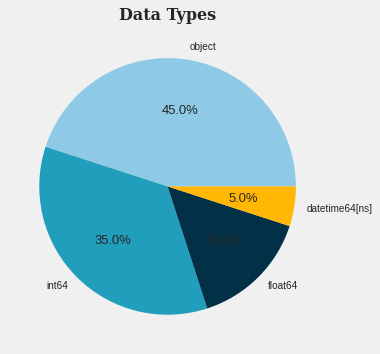

In [32]:
print(f'Columns datatype: \n {df.dtypes}')
# sns pie plot dttypes
df.dtypes.value_counts().plot.pie(autopct='%1.1f%%', colors=colors)
# y label \
plt.ylabel('')
# set title with custom font
plt.title('Data Types', fontsize=16, fontweight='bold', fontdict={
    'fontsize': 18, 'fontfamily': 'serif', 'fontweight': 'bold'})

In [33]:
text_len = df['Text'].groupby(pd.cut(df['Text'].str.len(), np.arange(0, 20000+500, 500))).count().rename_axis(['Range']).reset_index()
text_len.head()

,Range,Text
0,"(0, 500]",414786
1,"(500, 1000]",110331
2,"(1000, 1500]",27062
3,"(1500, 2000]",9059
4,"(2000, 2500]",3443


In [34]:
text_len_50 = text_len[text_len['Text'] > 50]
text_len_50

,Range,Text
0,"(0, 500]",414786
1,"(500, 1000]",110331
2,"(1000, 1500]",27062
3,"(1500, 2000]",9059
4,"(2000, 2500]",3443
5,"(2500, 3000]",1556
6,"(3000, 3500]",960
7,"(3500, 4000]",346
8,"(4000, 4500]",260
9,"(4500, 5000]",310


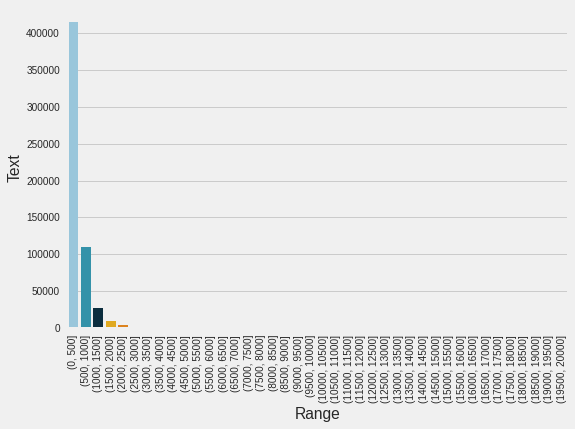

In [35]:
g = sns.barplot( x=text_len_50['Range'][0:10],y=text_len_50['Text'][0:10],palette=palette)
# g.set_xticks(range(11))
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g

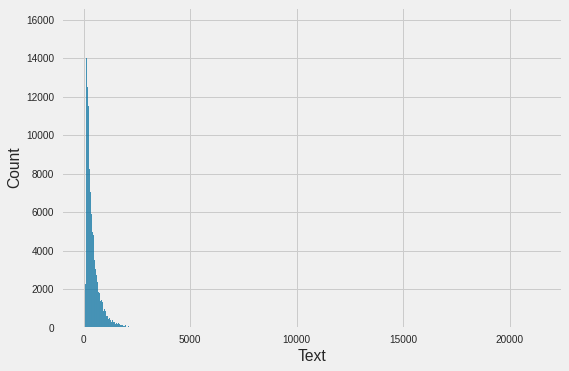

In [36]:
sns.histplot(data=df, x=df['Text'].str.len(),palette=palette)

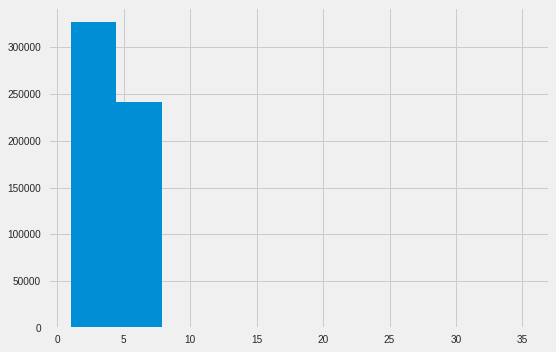

In [37]:
df['Text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

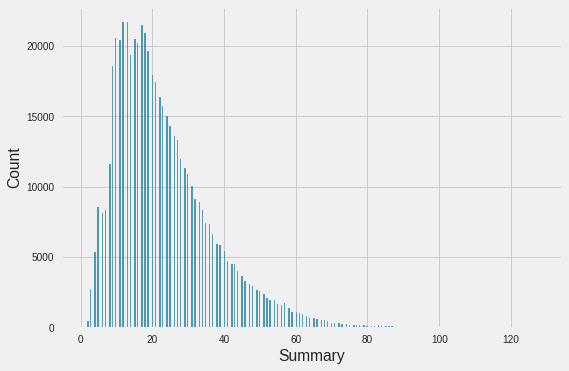

In [38]:
sns.histplot(data=df, x=df['Summary'].str.len(),palette=palette)

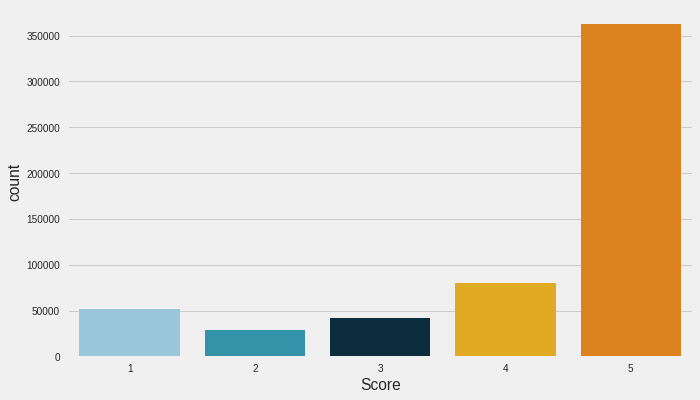

In [39]:
plt.figure(figsize=(10, 6))
g = sns.countplot(
    data=df, 
    x="Score",
    palette=palette,
)

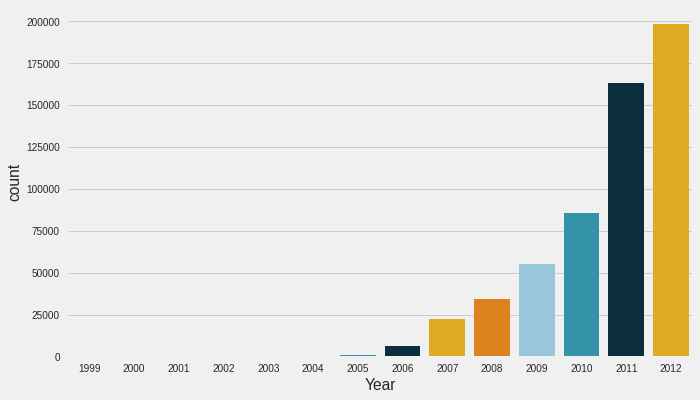

In [40]:
plt.figure(figsize=(10, 6))
g = sns.countplot(
    data=df, 
    x="Year",
    palette=palette,
)

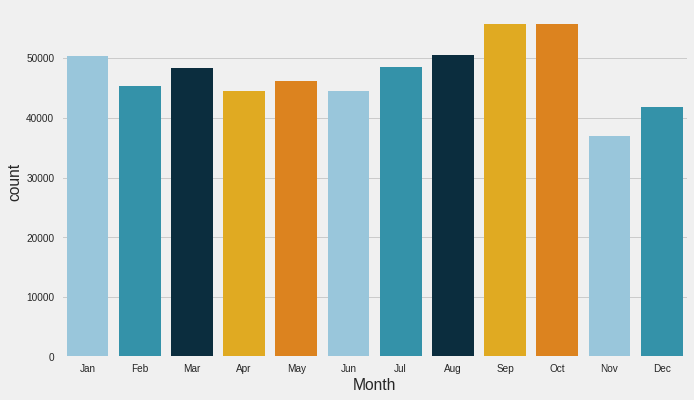

In [41]:
plt.figure(figsize=(10, 6))
g = sns.countplot(
    data=df, 
    x="Month",
    palette=palette,
)
# set the labels
g.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug", "Sep", "Oct", "Nov", "Dec"])
g

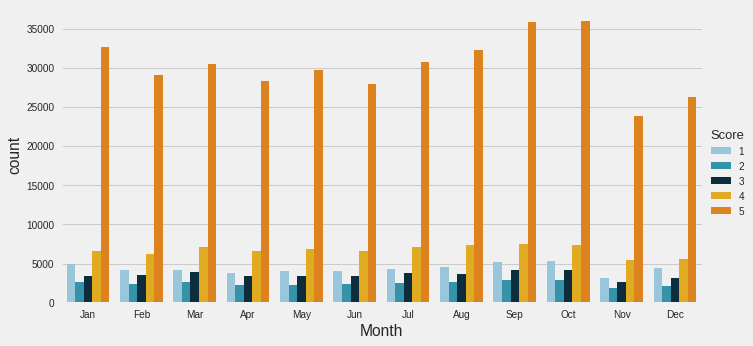

In [42]:
g = sns.catplot(kind='count', x='Month',  hue='Score', data=df,palette=palette,ci=None, height=5, aspect=2)
# set the labels
g.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug", "Sep", "Oct", "Nov", "Dec"])

In [43]:
df['Sentiment_Score'] = df['Score'].apply(lambda x: 1 if x >=3 else 0)

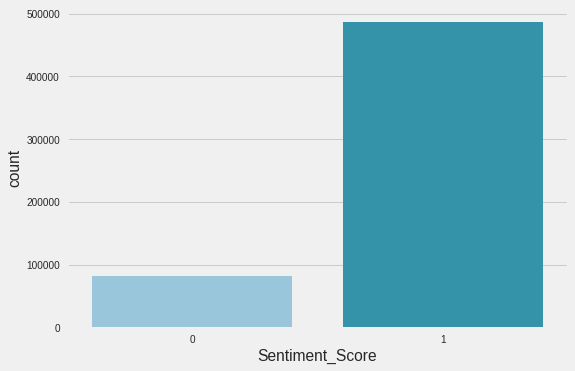

In [44]:
sns.countplot(data=df,x='Sentiment_Score', palette=palette)

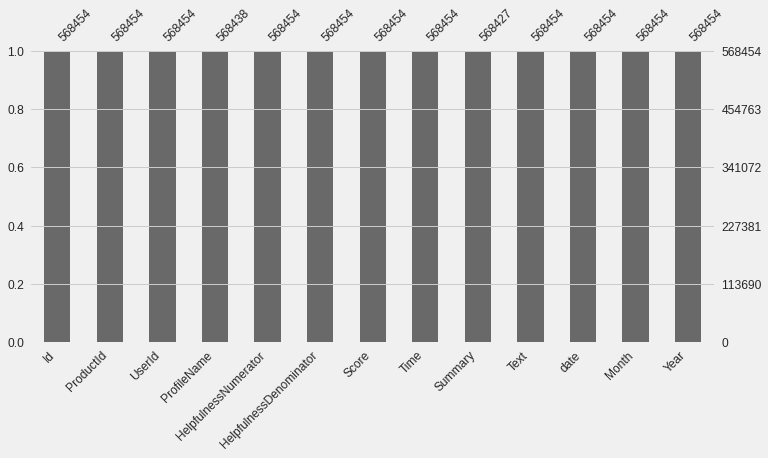

In [8]:
plt.figure(figsize = (24, 5))
axz = plt.subplot(1,2,2)
mso.bar(df, ax = axz, fontsize = 12)

In [9]:
df.dropna(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df['Full_Text'] = df['Summary'] + ' ' + df['Text']

In [12]:
def clean_html(html):

    # parse html content
    soup = BeautifulSoup(html, "html.parser")

    for data in soup(['style', 'script', 'code', 'a']):
        # Remove tags
        data.decompose()

    # return data by retrieving the tag content
    return ' '.join(soup.stripped_strings)

df['Full_Text_HTML'] = df['Full_Text'].parallel_apply(lambda x: clean_html(x))

In [13]:
def remove_punctuation(text):
    punctuation ="".join([i for i in text if i not in string.punctuation])
    return punctuation
#storing the puntuation free text
df['clean_review']= df['Full_Text_HTML'].parallel_apply(lambda x:remove_punctuation(x))

In [14]:
df['lower_review'] = df['clean_review'].parallel_apply(lambda x: x.lower())

In [45]:
def remove_stopwords(text):
    text = text.split()
    useless_words = nltk.corpus.stopwords.words("english")
    useless_words = useless_words + ['hi', 'im']
    text_filtered = [word for word in text if not word in useless_words]
    final_string = ' '.join(text_filtered)
    return final_string
df['no_stopwords']= df['lower_review'].parallel_apply(lambda x:remove_stopwords(x))

In [47]:
df['review_tokenied']= df['no_stopwords'].parallel_apply(lambda x: nltk.word_tokenize(x))

EOFError: ignored

In [48]:
 # defining the  Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
     lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
     return lemm_text
df['review_lemmatized']= df['no_stopwords'].parallel_apply(lambda x:lemmatizer(x))

EOFError: ignored

<Figure size 1080x576 with 0 Axes>

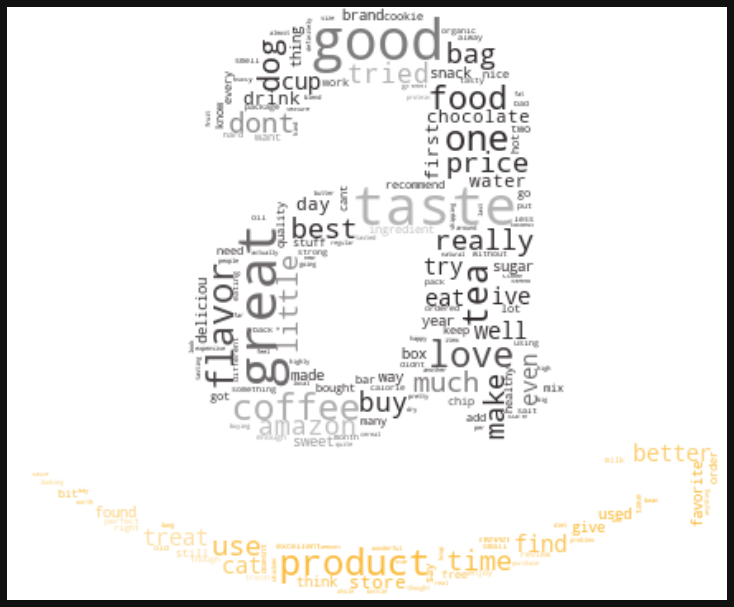

In [49]:
from PIL import Image
import requests

txt = ' '.join(''.join(rev) for rev in df.no_stopwords)
plt.figure(figsize=(15,8))
amazon_mask = np.array(Image.open(requests.get('https://pngimg.com/uploads/amazon/amazon_PNG4.png', stream=True).raw))
amazon_mask

wc = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, mask=amazon_mask).generate(txt)
image_colors = ImageColorGenerator(amazon_mask)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10,10), facecolor="k")
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wc, interpolation='bilinear')
plt.show()

In [50]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity_score'] = df['no_stopwords'].parallel_apply(lambda x : polarity(x))

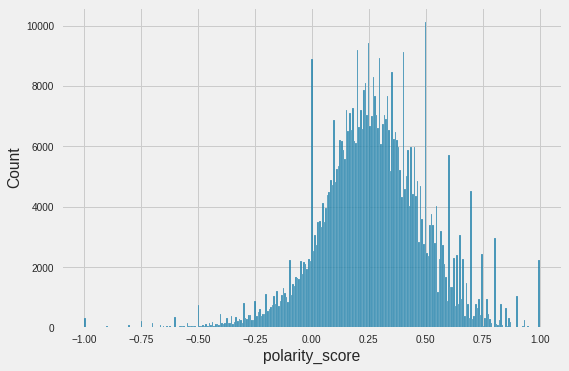

In [51]:
sns.histplot(x=df['polarity_score'])

In [52]:
def sentiment(x):
    if x < 0:
        return 'neg'
    elif x == 0:
        return 'neu'
    else:
        return 'pos'
    
df['polarity']= df['polarity_score'].parallel_apply(lambda x: sentiment(x))

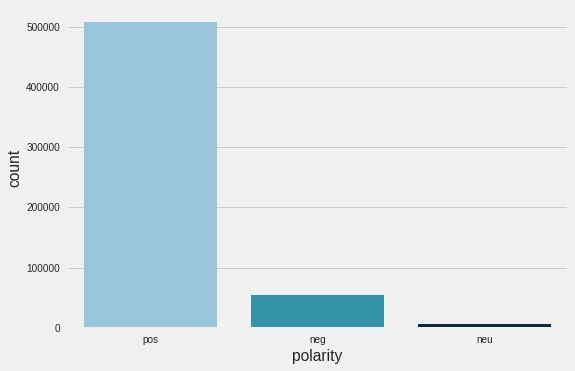

In [53]:
sns.countplot(x=df['polarity'],palette=palette)

In [55]:
sid = SentimentIntensityAnalyzer()

def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    return np.argmax(list(ss.values())[:-1])

df['sid_polarity']= df['no_stopwords'].parallel_apply(lambda x: get_vader_score(x))
df['sid_polarity'].replace({0:'neg',1:'neu',2:'pos'})

0         neu
1         neu
2         neu
3         neu
4         pos
         ... 
568449    neu
568450    neu
568451    neu
568452    pos
568453    neu
Name: sid_polarity, Length: 568411, dtype: object

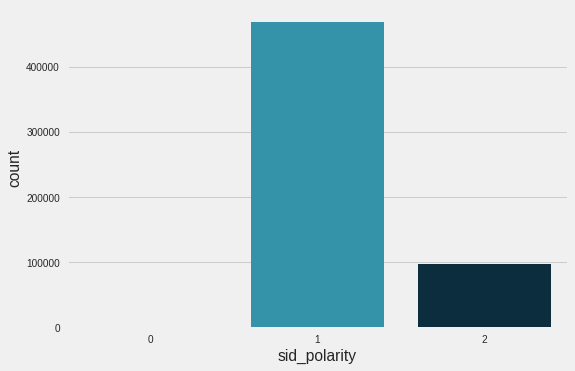

In [56]:
sns.countplot(x=df['sid_polarity'],palette=palette)

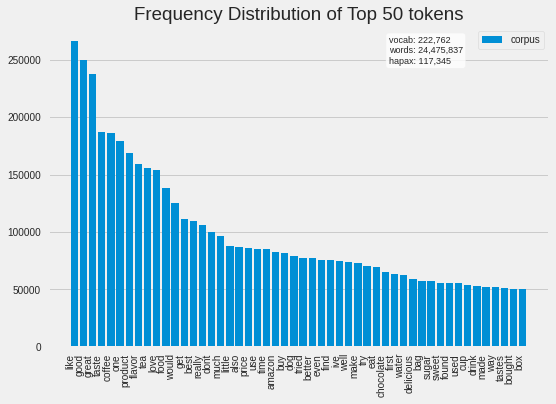

In [57]:
def word_distribution(text):
    vectorizer = CountVectorizer()
    docs = vectorizer.fit_transform(text)
    features = vectorizer.get_feature_names()
    # Freq Dist Visualizer
    visualizer = FreqDistVisualizer(features=features, orient='v')
    visualizer.fit(docs)
    visualizer.show()

word_distribution(df['no_stopwords'])

In [59]:
X = df['no_stopwords'].values
y = df['Sentiment_Score'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42,test_size = 0.20)

In [60]:
pipe = Pipeline(
    [
        ('vec', CountVectorizer(stop_words= "english")),
        ('tfidf', TfidfTransformer()),
        ('classifier', LogisticRegression()),
    ]
)

In [61]:
set_config(display="diagram")
pipe  # click on the diagram below to see the details of each step

Pipeline(steps=[('vec', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [62]:
fit = pipe.fit(X_train,y_train)

In [63]:
y_pred = pipe.predict(X_test)

In [64]:
print('Training accuracy:', fit.score(X_train,y_train))
print('Test accuracy:', fit.score(X_test,y_test))

Training accuracy: 0.940964708573037
Test accuracy: 0.933701608859724


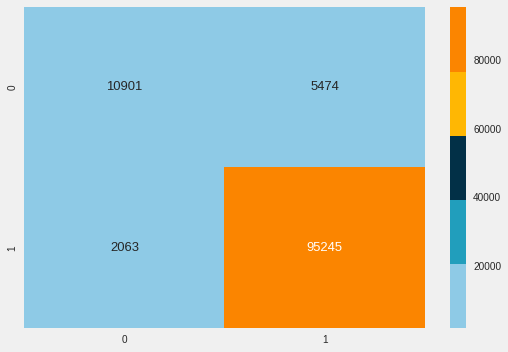

In [65]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d", cmap=colors)